### 1. Business Understanding

Within this notebook I analyze AirBNB data from Seattle. In doing so I would like to answer the following questions:
1. How does the average price per night differ for differnet room types? Is there also a difference in variance?
2. Can the findings be explained by room size?
3. Can we predict the price for one night based on other fields in this data set?

### 2. Data Understanding




In [1]:
# Load all libraries needed within this notebook here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load all necessary data files and assign data frames.
listings_df = pd.read_csv('./listings.csv')
#calendar_df = pd.read_csv('./calendar.csv')
#reviews_df = pd.read_csv('./reviews.csv')

In [3]:
# Have first look at the data set:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
# How many rows and columns do we see?
number_rows = listings_df.shape[0]
number_columns = listings_df.shape[1]

print('There are', number_rows, 'rows in the data set with', number_columns, 'columns.')

There are 3818 rows in the data set with 92 columns.


In [5]:
# Let´s have a look at missing values:
#fields_with_no_nulls = set(listings_df.columns[listings_df.isnull()==0])
fields_with_no_nulls = set(listings_df.columns[listings_df.isnull().mean()==0])
fields_with_many_nulls = set(listings_df.columns[listings_df.isnull().mean() > 0.50])
print(len(fields_with_no_nulls), 'fields have no missing values.')
print(len(fields_with_many_nulls), 'fields have more than 50 % missing values.')


47 fields have no missing values.
4 fields have more than 50% missing values.


In [6]:
# This can be used to see what field names contain:
listings_col = list(listings_df.columns)
print(listings_col)
listings_df.iloc[1:5, 81:]

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'gues

,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,10.0,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,NaN,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,9.0,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [33]:
# Explore target variable:
listings_df['price'][0:5]

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

In [8]:
# Price field contains '$'sign. Remove to convert price field from string to float:
listings_df['price'] = listings_df['price'].apply(lambda x: str(x).strip('$').replace(',', ''))
listings_df['price'] = listings_df['price'].astype('float64')

listings_df['cleaning_fee'] = listings_df['cleaning_fee'].apply(lambda x: str(x).strip('$').replace(',', ''))
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].astype('float64')

# This is usually a step in (3) Data Preparation. 
# Because we want to answer questions on room price and type, we need to clean that field already here.

# apply function:
# https://www.geeksforgeeks.org/clean-the-string-data-in-the-given-pandas-dataframe/

In [9]:
# See other field types:
print("data types: \n", listings_df.dtypes)

data types: 
 id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time

(array([105., 411., 548., 627., 553., 380., 349., 183., 105., 130.,  72.,
         99.,  18.,  34.,  49.,  17.,  39.,   5.,  11.,  21.,   5.,  15.,
          2.,   4.,   9.,   1.,   1.,   6.,   1.,   4.,   0.,   0.,   0.,
          2.,   3.,   0.,   0.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   1.,   2.]),
 array([  20. ,   39.6,   59.2,   78.8,   98.4,  118. ,  137.6,  157.2,
         176.8,  196.4,  216. ,  235.6,  255.2,  274.8,  294.4,  314. ,
         333.6,  353.2,  372.8,  392.4,  412. ,  431.6,  451.2,  470.8,
         490.4,  510. ,  529.6,  549.2,  568.8,  588.4,  608. ,  627.6,
         647.2,  666.8,  686.4,  706. ,  725.6,  745.2,  764.8,  784.4,
         804. ,  823.6,  843.2,  862.8,  882.4,  902. ,  921.6,  941.2,
         960.8,  980.4, 1000. ]),
 <a list of 50 Patch objects>)

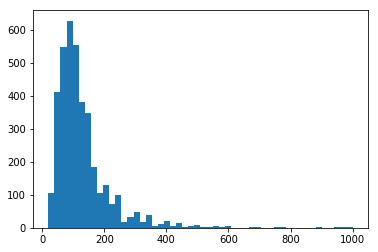

In [10]:
# As I am highly interested in price behaviour in this data set, I plot the histogram for price field:
plt.hist(listings_df['price'], bins = 50)

# The data is right skewed: Many rooms have a rather small price around the mean but there also also a few more expensive ones.

Text(0.5,1,'Average price of different room types')

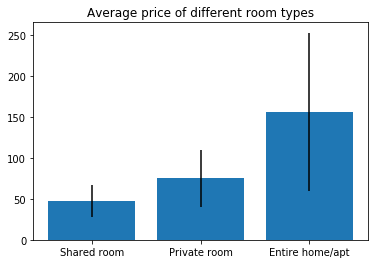

In [11]:
# Calculate average room price and its standard deviation for bar chart:
price_by_room = listings_df.groupby(['room_type']).mean()['price'].sort_values()
std_by_room = listings_df.groupby(['room_type']).std()['price'].sort_values()

plt.bar(list(price_by_room.index), price_by_room, yerr = std_by_room)
plt.title("Average price of different room types")

Text(0.5,1,'Average room size in squre feet')

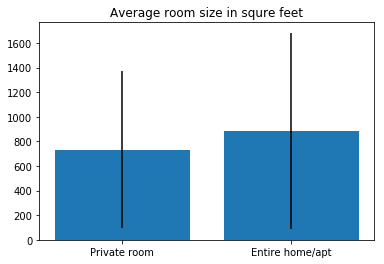

In [12]:
# Calculate average room size and its standard deviation for bar chart:
size_by_room = listings_df.groupby(['room_type']).mean()['square_feet'].sort_values()
std_room_size = listings_df.groupby(['room_type']).std()['square_feet'].sort_values()

plt.bar(list(size_by_room.index), size_by_room, yerr = std_room_size)
plt.title("Average room size in squre feet")

### Answer to Question 1 and 2:

From the data we see that the average price per night differs for different room types. It is low for shared rooms, higher for private rooms and the highest prices you can find for entire home/apartments. This is what we would expect.
Nevertheless, you could be sourprised about the standard deviations: This is way higher for entire home/apt than for other room types. Can this be explained by room size? This is not the case as the mean and standard deviation of room size for private rooms and entire home/apt are quite similar. There must be other factors that explain room price and its variance.

### 3. Prepare Data

In [13]:
# Drop columns that are not relevant for data modelling:
# Those columns are e.g. Ids or string fields like names that I do not expect to explain price.
listings_short_df = listings_df
columns_to_drop = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'street', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'calendar_last_scraped', 'jurisdiction_names', 'weekly_price', 'monthly_price', 'notes', 'host_acceptance_rate', 'first_review', 'last_review', 'host_neighbourhood', 'experiences_offered', 'requires_license', 'neighbourhood_cleansed', 'has_availability','neighbourhood']
listings_short_df = listings_df.drop(columns_to_drop, axis = 1)
print(listings_short_df.shape)
# host_acceptance_rate is dropped because all available values are the same (100%).

(3818, 49)


In [14]:
# First handle missing values
# Drop all rows that have only missing values:
listings_short_df = listings_short_df.dropna(axis=0, how='all')

# Drop fields with more than 50% missing values:
drop_fields_missing_values = list(listings_short_df.isnull().sum().sort_values(ascending=False)[listings_short_df.isnull().sum().sort_values(ascending=False)>(len(listings_short_df)*0.5)].index)
listings_short_df = listings_short_df.drop(drop_fields_missing_values, axis = 1)

# I would like to predict the price. So I drop all rows with missing values in price field:
listings_short_df = listings_short_df.dropna(subset=['price'], how='any')

number_rows = listings_short_df.shape[0]
number_columns = listings_short_df.shape[1]

print('There are', number_rows, 'rows in the data set with', number_columns, 'columns.')

There are 3818 rows in the data set with 46 columns.


In [15]:
# See how many values are missing for all columns:
listings_short_df.isnull().sum().sort_values(ascending=False)

cleaning_fee                        1030
review_scores_accuracy               658
review_scores_checkin                658
review_scores_value                  656
review_scores_location               655
review_scores_cleanliness            653
review_scores_communication          651
review_scores_rating                 647
reviews_per_month                    627
host_response_time                   523
host_response_rate                   523
bathrooms                             16
bedrooms                               6
host_since                             2
host_is_superhost                      2
host_listings_count                    2
host_total_listings_count              2
host_has_profile_pic                   2
host_identity_verified                 2
property_type                          1
beds                                   1
extra_people                           0
longitude                              0
require_guest_profile_picture          0
require_guest_ph

In [16]:
# Impute values in remaining columns with null values:
impute_mean = lambda column: column.fillna(column.mean())
impute_mode = lambda column: column.fillna(column.mode()[0])
impute_zero = lambda column: column.fillna(0)

#cleansing_fee has a $ sign similar to price field. Remove fist:
listings_short_df['cleaning_fee'] = listings_short_df['cleaning_fee'].apply(lambda x: str(x).strip('$').replace(',', ''))
listings_short_df['cleaning_fee'] = listings_short_df['cleaning_fee'].astype('float64')
listings_short_df[['cleaning_fee']] = listings_short_df[['cleaning_fee']].apply(impute_mean, axis = 0)

listings_short_df['extra_people'] = listings_short_df['extra_people'].apply(lambda x: str(x).strip('$').replace(',', ''))
listings_short_df['extra_people'] = listings_short_df['extra_people'].astype('float64')
listings_short_df['host_response_rate'] = listings_short_df['host_response_rate'].apply(lambda x: str(x).strip('%').replace(',', ''))
listings_short_df['host_response_rate'] = listings_short_df['host_response_rate'].astype('float64')

listings_short_df[['bathrooms']] = listings_short_df[['bathrooms']].apply(impute_mean, axis = 0)
listings_short_df[['bedrooms']] = listings_short_df[['bedrooms']].apply(impute_mean, axis = 0)
listings_short_df[['beds']] = listings_short_df[['beds']].apply(impute_mean, axis = 0)

listings_short_df[['property_type']] = listings_short_df[['property_type']].apply(impute_mode, axis = 0)


# For 627 rows there is no review score for various categories. I save those rows in a dummy variable:
listings_short_df['review_scores_missing'] = listings_short_df['review_scores_checkin'].isnull()
# Now the review scores fields can be imputed with mean:
listings_short_df[['review_scores_checkin']] = listings_short_df[['review_scores_checkin']].apply(impute_mean, axis = 0)
listings_short_df[['review_scores_accuracy']] = listings_short_df[['review_scores_accuracy']].apply(impute_mean, axis = 0)
listings_short_df[['review_scores_value']] = listings_short_df[['review_scores_value']].apply(impute_mean, axis = 0)
listings_short_df[['review_scores_location']] = listings_short_df[['review_scores_location']].apply(impute_mean, axis = 0)
listings_short_df[['review_scores_cleanliness']] = listings_short_df[['review_scores_cleanliness']].apply(impute_mean, axis = 0)
listings_short_df[['review_scores_communication']] = listings_short_df[['review_scores_communication']].apply(impute_mean, axis = 0)
listings_short_df[['review_scores_rating']] = listings_short_df[['review_scores_rating']].apply(impute_mean, axis = 0)

listings_short_df[['reviews_per_month']] = listings_short_df[['reviews_per_month']].apply(impute_zero, axis = 0)

listings_short_df[['host_response_time']] = listings_short_df[['host_response_time']].apply(impute_mode, axis = 0)
listings_short_df[['host_response_rate']] = listings_short_df[['host_response_rate']].apply(impute_mode, axis = 0)
#listings_short_df[['host_neighbourhood']] = listings_short_df[['host_neighbourhood']].apply(impute_mean, axis = 0)

listings_df['host_since'] = listings_df['host_since'].astype('datetime64')
listings_short_df[['host_is_superhost']] = listings_short_df[['host_is_superhost']].apply(impute_mode, axis = 0)
listings_short_df[['host_has_profile_pic']] = listings_short_df[['host_has_profile_pic']].apply(impute_mode, axis = 0)
listings_short_df[['host_identity_verified']] = listings_short_df[['host_identity_verified']].apply(impute_mode, axis = 0)
listings_short_df[['host_listings_count']] = listings_short_df[['host_listings_count']].apply(impute_mean, axis = 0)
listings_short_df[['host_total_listings_count']] = listings_short_df[['host_total_listings_count']].apply(impute_mean, axis = 0)

listings_short_df[['host_since']] = listings_short_df[['host_since']].apply(impute_mode, axis = 0)
print(listings_short_df.shape)

(3818, 47)


In [29]:
# Create 'host_since_year' from 'host_since':
listings_short_df['host_since_year'] = listings_short_df['host_since'].apply(lambda x: str(x)[0:4])
listings_short_df = listings_short_df.drop('host_since', axis = 1)
listings_short_df['host_since_year'] = listings_short_df['host_since_year'].astype('int64')

KeyError: 'host_since'

In [50]:
# What about boolean variables? First create a list 
list_bool_variables = list(listings_short_df.dtypes.sort_values()[listings_short_df.dtypes.sort_values()=='bool'].index)
print(list_bool_variables)

['review_scores_missing']


'review_scores_missing'

In [51]:
# What about categorical variables? Create annother list and append both
list_cat_variables = list(listings_short_df.dtypes.sort_values()[listings_short_df.dtypes.sort_values()=='object'].index)
# Add boolean variable:
list_cat_variables.append(list_bool_variables[0])
print(list_cat_variables)

['amenities', 'host_is_superhost', 'require_guest_phone_verification', 'require_guest_profile_picture', 'cancellation_policy', 'instant_bookable', 'host_identity_verified', 'host_has_profile_pic', 'neighbourhood_group_cleansed', 'is_location_exact', 'property_type', 'room_type', 'calendar_updated', 'bed_type', 'host_verifications', 'host_response_time', 'review_scores_missing']


In [52]:
# 'host_verifications' and 'amenities' contain many values per row. Create dummy variables for all entries:
listings_dummies_df = listings_short_df

listings_dummies_df['host_verifications'] = listings_dummies_df['host_verifications'].apply(lambda x: str(x).strip('[').strip(']').replace("'", ""))
listings_dummies_df['amenities'] = listings_dummies_df['amenities'].apply(lambda x: str(x).strip('{').strip('}').replace('"', ''))

listings_dummies_conc_df = pd.concat([listings_dummies_df, 
                               listings_dummies_df['amenities'].str.get_dummies(sep=",").add_prefix('amenities_'),
                               listings_dummies_df['host_verifications'].str.get_dummies(sep=", ").add_prefix('host_verifications_')], axis = 1)

listings_dummies_clean_df = listings_dummies_conc_df.drop(['amenities', 'host_verifications'], axis = 1)
print(listings_dummies_clean_df.shape)

# I found a hint on how to split amenities and host_verifications on StackExchange:
# https://datascience.stackexchange.com/questions/38914/a-single-column-has-many-values-per-row-separated-by-a-comma-how-to-create-an

(3818, 101)


In [56]:
# See how many dummy variables would be created from categorical variables:
list_cat_variables = list(listings_dummies_clean_df.dtypes.sort_values()[listings_dummies_clean_df.dtypes.sort_values()=='object'].index)
list_bool_variables = list(listings_short_df.dtypes.sort_values()[listings_short_df.dtypes.sort_values()=='bool'].index)
list_cat_variables.append(list_bool_variables[0])
for col in list_cat_variables:
    print(col)
    print(pd.get_dummies(listings_short_df[col], prefix = col, prefix_sep = '_', drop_first = True).shape)

host_is_superhost
(3818, 1)
host_has_profile_pic
(3818, 1)
host_identity_verified
(3818, 1)
neighbourhood_group_cleansed
(3818, 16)
calendar_updated
(3818, 33)
property_type
(3818, 15)
room_type
(3818, 2)
bed_type
(3818, 4)
instant_bookable
(3818, 1)
cancellation_policy
(3818, 2)
require_guest_profile_picture
(3818, 1)
require_guest_phone_verification
(3818, 1)
is_location_exact
(3818, 1)
host_response_time
(3818, 3)
review_scores_missing
(3818, 1)


In [57]:
# Create dummy variables from categorical variables:
listings_dummies_all_clean_df = listings_dummies_clean_df

for col in list_cat_variables:
    listings_dummies_all_clean_df = pd.concat(
        [
        pd.get_dummies(listings_dummies_all_clean_df[col], prefix = col,prefix_sep = '_', drop_first = True),
        listings_dummies_all_clean_df
        ]
        ,axis = 1)

for col in list_cat_variables:
    listings_dummies_all_clean_df = listings_dummies_all_clean_df.drop(col, axis = 1)
    
print(listings_dummies_all_clean_df.shape)

(3818, 169)
